In [2]:
# initial and general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from colorama import Fore, Back, Style
from sklearn import tree
from matplotlib.ticker import MaxNLocator
import itertools
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import collections 

# machine learning libraries
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# accuracy and metrics libraries
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# improve hyperparameters libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# fill null data libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Balancing dataset
from sklearn.utils import resample

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# imbalaced dataset 
import smote_variants as sv
import imbalanced_databases as imbd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier


sns.set()
%matplotlib inline

2022-07-05 14:30:47,732:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
# Import primri data by ORgData name here
OrgData = pd.read_csv('mayo.csv')
OrgData

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1,400,2,1.0,58.765229,f,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,1.0,56.446270,f,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,1.0,70.072553,m,0.0,0.0,0.0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,1.0,54.740589,f,0.0,1.0,1.0,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,2.0,38.105407,f,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,NaN,67.000684,f,NaN,NaN,NaN,0.0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0,NaN,39.000684,f,NaN,NaN,NaN,0.0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0,NaN,56.999316,f,NaN,NaN,NaN,0.0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0,NaN,58.001369,f,NaN,NaN,NaN,0.0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
# row and column count
rowCount = OrgData.shape[0]
colCount = OrgData.shape[1]
print(Back.WHITE+f'dataset have '+Back.RED+(str(rowCount))+Back.WHITE+' instances(rows)')
print(Back.WHITE+f'dataset have '+Back.RED+(str(colCount))+'  '+
      Back.WHITE+' features(columns)')

dataset have 418 instances(rows)
dataset have 20   features(columns)


In [5]:
# describe the dataset in here
OrgData.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,418.0,NaN,NaN,NaN,209.500000,120.810458,1.000000,105.250000,209.500000,313.750000,418.000000
time,418.0,NaN,NaN,NaN,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
status,418.0,NaN,NaN,NaN,0.830144,0.955785,0.000000,0.000000,0.000000,2.000000,2.000000
trt,312.0,NaN,NaN,NaN,1.493590,0.500762,1.000000,1.000000,1.000000,2.000000,2.000000
age,418.0,NaN,NaN,NaN,50.741551,10.447214,26.277892,42.832307,51.000684,58.240931,78.439425
sex,418,2,f,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ascites,312.0,NaN,NaN,NaN,0.076923,0.266897,0.000000,0.000000,0.000000,0.000000,1.000000
hepato,312.0,NaN,NaN,NaN,0.512821,0.500639,0.000000,0.000000,1.000000,1.000000,1.000000
spiders,312.0,NaN,NaN,NaN,0.288462,0.453775,0.000000,0.000000,0.000000,1.000000,1.000000
edema,418.0,NaN,NaN,NaN,0.100478,0.253417,0.000000,0.000000,0.000000,0.000000,1.000000


2022-07-05 14:30:48,039:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2022-07-05 14:30:48,041:DEBUG:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,042:DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 2.05
2022-07-05 14:30:48,043:DEBUG:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,045:DEBUG:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,046:DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 3.05
2022-07-05 14:30:48,047:DEBUG:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,048:DEBUG:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:48,050:DEBU

2022-07-05 14:30:48,141:DEBUG:findfont: score(<Font 'MRT_Aramco Bold' (Aramco Bold_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,143:DEBUG:findfont: score(<Font '2  Bardiya' (SBARDYBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,144:DEBUG:findfont: score(<Font 'MRT_Tye' (Tye_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,144:DEBUG:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,146:DEBUG:findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
2022-07-05 14:30:48,146:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
2022-07-05 14:30:48,147:DEBUG:findfont: score(<Font 'MRT_Nawal' (Nawal_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:48,148:DEBUG:findfont: score(<Font 'B Kamran Outline' (BKamranO.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,152:DEBUG:findfont: score(<Font '2  Traffic

2022-07-05 14:30:48,229:DEBUG:findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,232:DEBUG:findfont: score(<Font 'MRT_Dinar One Light' (Dinar One Light_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:48,236:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:48,239:DEBUG:findfont: score(<Font 'MRT_Cordoba' (Cordoba_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,240:DEBUG:findfont: score(<Font 'MRT_East Extra Bold' (East Extra Bold_MRT.ttf) normal normal 800 normal>) = 10.43
2022-07-05 14:30:48,241:DEBUG:findfont: score(<Font 'MRT_Thameen Book' (Thameen Book_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:48,242:DEBUG:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,242:DEBUG:findfont: score(<Font 'Swis721 LtCn BT' (swisscl.ttf) normal normal 400 condensed>) = 10.25
2022-07-05 14:3

2022-07-05 14:30:48,323:DEBUG:findfont: score(<Font '2  Traffic' (STRAFFIC.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,324:DEBUG:findfont: score(<Font 'CountryBlueprint' (counb___.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,324:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
2022-07-05 14:30:48,325:DEBUG:findfont: score(<Font 'MRT_Free' (Free_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,326:DEBUG:findfont: score(<Font 'G2 DF Diversions LET' (DIVERSN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,327:DEBUG:findfont: score(<Font 'MRT_Takhteh' (Takhteh_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,327:DEBUG:findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
2022-07-05 14:30:48,328:DEBUG:findfont: score(<Font 'MRT_Tafseer' (Tafseer_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:48,329:DEBUG:findfont: score(<Font 'MRT_L

2022-07-05 14:30:48,414:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
2022-07-05 14:30:48,415:DEBUG:findfont: score(<Font 'B Morvarid' (BMorvard.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,417:DEBUG:findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,420:DEBUG:findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,421:DEBUG:findfont: score(<Font 'MRT_AridiNaskh Plain' (AridiNaskh Plain_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,422:DEBUG:findfont: score(<Font 'MRT_TV Bold' (TV Bold_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,424:DEBUG:findfont: score(<Font 'B Aria' (BAria.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,424:DEBUG:findfont: score(<Font 'ISOCPEUR' (isocpeui.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:48,425:DEBUG:findfont: score(<Font '2  Kidnap'

2022-07-05 14:30:48,498:DEBUG:findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,499:DEBUG:findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,501:DEBUG:findfont: score(<Font '2  Elham' (SELHAM.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,503:DEBUG:findfont: score(<Font '2  Mitra_2 (MRT)' (MMITRABDMRT2.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,504:DEBUG:findfont: score(<Font 'MRT_Heritage One Bold' (Heritage One Bold_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,505:DEBUG:findfont: score(<Font 'MRT_Fantezy' (Fantezy_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,506:DEBUG:findfont: score(<Font 'B Sooreh' (BSoorehB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,506:DEBUG:findfont: score(<Font 'MRT_Sozar' (Sozar_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,507:DEBUG:findfont: score(<Fon

2022-07-05 14:30:48,575:DEBUG:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,575:DEBUG:findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,576:DEBUG:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,577:DEBUG:findfont: score(<Font '2  Tawfig Outline' (STAWFIGO.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,577:DEBUG:findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,578:DEBUG:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,579:DEBUG:findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,584:DEBUG:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,586:DEBUG:findfont: score(<Font 'Proxy 4'

2022-07-05 14:30:48,662:DEBUG:findfont: score(<Font 'Swis721 Cn BT' (swissc.ttf) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:48,663:DEBUG:findfont: score(<Font 'EuroRoman' (eurr____.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,664:DEBUG:findfont: score(<Font 'Proxy 5' (mtproxy5.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,665:DEBUG:findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:48,666:DEBUG:findfont: score(<Font 'MRT_King 2' (King 2_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,668:DEBUG:findfont: score(<Font 'MRT_Poster_11' (MRT_poster10.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,670:DEBUG:findfont: score(<Font 'B Mitra' (BMitraBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,672:DEBUG:findfont: score(<Font 'MRT_Mandana' (Mandana_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,673:DEBUG:findfont: score(<Font 'Perpetua Titling 

2022-07-05 14:30:48,738:DEBUG:findfont: score(<Font 'MRT_Nasr' (Nasr_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:48,738:DEBUG:findfont: score(<Font 'B Moj' (BMoj.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,739:DEBUG:findfont: score(<Font 'B Vahid' (BVahidBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,740:DEBUG:findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:48,740:DEBUG:findfont: score(<Font 'Swis721 Ex BT' (swisse.ttf) normal normal 400 expanded>) = 10.25
2022-07-05 14:30:48,741:DEBUG:findfont: score(<Font 'MRT_Tasmeem' (Tasmeem_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,742:DEBUG:findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:48,742:DEBUG:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:48,743:DEBUG:findfont: score(<Font 'Century Sch

2022-07-05 14:30:48,812:DEBUG:findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,813:DEBUG:findfont: score(<Font 'MRT_Poster_12' (MRT_poster11.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,813:DEBUG:findfont: score(<Font '2  Majid Shadow' (SMAJIDS.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,814:DEBUG:findfont: score(<Font '2  Nasim' (SNASIMBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,815:DEBUG:findfont: score(<Font '2  Yekan' (SYEKAN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,815:DEBUG:findfont: score(<Font 'Swis721 Ex BT' (swisseb.ttf) normal normal 700 expanded>) = 10.535
2022-07-05 14:30:48,816:DEBUG:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
2022-07-05 14:30:48,817:DEBUG:findfont: score(<Font 'Sina' (SinaB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,821:DEBUG:findfont: score(<Font 'MRT_Faten' 

2022-07-05 14:30:48,879:DEBUG:findfont: score(<Font 'B Mahsa' (BMahsa.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,879:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:48,882:DEBUG:findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
2022-07-05 14:30:48,883:DEBUG:findfont: score(<Font 'B Medad' (BMedad.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,886:DEBUG:findfont: score(<Font 'MRT_Poster_4' (MRT_poster18.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,887:DEBUG:findfont: score(<Font 'B Yas' (BYas.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,888:DEBUG:findfont: score(<Font 'MRT_Silicon' (Silicon_MRT.ttf) normal normal 100 normal>) = 10.335
2022-07-05 14:30:48,888:DEBUG:findfont: score(<Font 'MRT_Elit' (Elit_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:48,889:DEBUG:findfont: score(<Font 'MRT_Alphabet' (Alphabet_MRT.ttf)

2022-07-05 14:30:48,951:DEBUG:findfont: score(<Font 'MRT_Saeed' (Saeed_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,953:DEBUG:findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,954:DEBUG:findfont: score(<Font 'B Compset' (BCompset.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,955:DEBUG:findfont: score(<Font 'MRT_Naskh Titr Outline' (Naskh Titr Outline_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:48,955:DEBUG:findfont: score(<Font 'MRT_Advertising Light' (Advertising Light_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:48,956:DEBUG:findfont: score(<Font 'MRT_Pashtu Star' (Pashtu Star_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,957:DEBUG:findfont: score(<Font 'MRT_Dalal St' (Dalal St_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:48,957:DEBUG:findfont: score(<Font 'MRT_Classic' (Classic_MRT.ttf) normal normal 700 normal>) = 10.335
202

2022-07-05 14:30:49,022:DEBUG:findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
2022-07-05 14:30:49,022:DEBUG:findfont: score(<Font 'MRT_Fantezy Cut' (Fantezy Cut_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,023:DEBUG:findfont: score(<Font '2  Lotus' (SLOTUS.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,024:DEBUG:findfont: score(<Font 'MRT_Mavaheb' (Mavaheb_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:49,025:DEBUG:findfont: score(<Font 'B Nazanin' (BNazanin.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,026:DEBUG:findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,026:DEBUG:findfont: score(<Font 'Roya' (Roya.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,027:DEBUG:findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,028:DEBUG:findfont: score(<Font 'Century Schoolbo

2022-07-05 14:30:49,094:DEBUG:findfont: score(<Font 'MRT_Shafigh Mangle' (Shafigh Mangle_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,095:DEBUG:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:49,095:DEBUG:findfont: score(<Font 'Swis721 Blk BT' (swissk.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,096:DEBUG:findfont: score(<Font 'TechnicBold' (techb___.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,097:DEBUG:findfont: score(<Font 'MRT_Neda' (Neda_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,098:DEBUG:findfont: score(<Font '2  Narenj' (SNARENJ.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,098:DEBUG:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 1.335
2022-07-05 14:30:49,100:DEBUG:findfont: score(<Font 'MRT_Lab' (Lab_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,104:DEBUG:findfont: score(<Font 'MRT_Poster_9' (MRT_

2022-07-05 14:30:49,172:DEBUG:findfont: score(<Font 'Sultan Normal' (Qertaj_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,173:DEBUG:findfont: score(<Font 'MRT_Zoheir' (Zoheir_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,174:DEBUG:findfont: score(<Font 'MRT_Old' (Old_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,177:DEBUG:findfont: score(<Font 'Nasim' (NasimB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,178:DEBUG:findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,178:DEBUG:findfont: score(<Font 'ISOCP' (isocp___.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,179:DEBUG:findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:49,180:DEBUG:findfont: score(<Font 'Dutch801 Rm BT' (dutchbi.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:49,181:DEBUG:findfont: score(<Font 'B

2022-07-05 14:30:49,244:DEBUG:findfont: score(<Font 'Dutch801 Rm BT' (dutchi.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:49,245:DEBUG:findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,246:DEBUG:findfont: score(<Font '2  Nikoo' (SNIKOOI.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:49,246:DEBUG:findfont: score(<Font 'MRT_Fares Light' (Fares Light_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,247:DEBUG:findfont: score(<Font '2  Mitra_4 (MRT)' (MMITRABDMRT4.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,247:DEBUG:findfont: score(<Font 'Proxy 3' (mtproxy3.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,248:DEBUG:findfont: score(<Font '2  Mitra_5 (MRT)' (MMITRABDMRT5.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,248:DEBUG:findfont: score(<Font 'MRT_Titr Outline' (Titr Outline_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,253:DEBU

2022-07-05 14:30:49,356:DEBUG:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,357:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:49,357:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:49,358:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,359:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:49,359:DEBUG:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,360:DEBUG:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,361:DEBUG:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>

2022-07-05 14:30:49,426:DEBUG:findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:49,428:DEBUG:findfont: score(<Font 'GENISO' (GENISO.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,428:DEBUG:findfont: score(<Font 'B Yekan' (BYekan.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,429:DEBUG:findfont: score(<Font 'MRT_Rana' (Rana_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,430:DEBUG:findfont: score(<Font 'MRT_Holool Mosaic' (Holool Mosaic_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,431:DEBUG:findfont: score(<Font 'MRT_Khateeb' (Khateeb_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,431:DEBUG:findfont: score(<Font 'MRT_Rafie Art' (Rafie Art_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,433:DEBUG:findfont: score(<Font 'MRT_Text Ultra Light' (Text Ultra Light_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,434:DEBUG:findfont: 

2022-07-05 14:30:49,496:DEBUG:findfont: score(<Font 'MRT_Farasha Light' (Farasha Light_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:49,496:DEBUG:findfont: score(<Font 'MRT_Pashtu Bold' (Pashtu Bold_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,497:DEBUG:findfont: score(<Font '2  Sara' (SSARA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,498:DEBUG:findfont: score(<Font 'Mola' (MRT_Moala.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,498:DEBUG:findfont: score(<Font 'Monospac821 BT' (monosb.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,499:DEBUG:findfont: score(<Font 'MRT_Thameen Light' (Thameen Light_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:49,500:DEBUG:findfont: score(<Font 'B Nasim' (BNasimBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,501:DEBUG:findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,503:DEBUG:fin

2022-07-05 14:30:49,563:DEBUG:findfont: score(<Font 'MRT_Joude' (Joude_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,563:DEBUG:findfont: score(<Font 'MRT_Silicon Outline' (Silicon Outline_MRT.ttf) normal normal 100 normal>) = 10.335
2022-07-05 14:30:49,564:DEBUG:findfont: score(<Font 'MRT_Sina Drip' (Sina Drip_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,565:DEBUG:findfont: score(<Font 'MRT_Elegant Light' (Elegant Light_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,565:DEBUG:findfont: score(<Font 'B Majid Shadow' (BMajidSh.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,566:DEBUG:findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:49,567:DEBUG:findfont: score(<Font 'MRT_Abasan' (Abasan_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,568:DEBUG:findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:4

2022-07-05 14:30:49,630:DEBUG:findfont: score(<Font 'MRT_Dinar Two Medium' (Dinar Two Medium_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,630:DEBUG:findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,631:DEBUG:findfont: score(<Font '2  Arabic Style' (SARABICS.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,631:DEBUG:findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,632:DEBUG:findfont: score(<Font 'MRT_Nova' (Nova_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,633:DEBUG:findfont: score(<Font 'MRT_Titr 3D' (Titr 3D_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,633:DEBUG:findfont: score(<Font 'G2 Buildings' (BUILDING.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,635:DEBUG:findfont: score(<Font 'GreekS' (greeks__.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,636:DEBUG:findfont: 

2022-07-05 14:30:49,701:DEBUG:findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,704:DEBUG:findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,705:DEBUG:findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,705:DEBUG:findfont: score(<Font 'MRT_Talat' (Talat_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,707:DEBUG:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,708:DEBUG:findfont: score(<Font 'MRT_Narrow Light' (Narrow Light_MRT.ttf) normal normal 700 condensed>) = 10.535
2022-07-05 14:30:49,708:DEBUG:findfont: score(<Font 'B Yas' (BYasBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,709:DEBUG:findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,709:DEBUG:findfont: score(<Font 'MRT_Liner XXL' 

2022-07-05 14:30:49,773:DEBUG:findfont: score(<Font 'B Yagut' (BYagutBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,774:DEBUG:findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:49,775:DEBUG:findfont: score(<Font 'Stylus BT' (stylu.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:49,775:DEBUG:findfont: score(<Font 'MRT_Bamshad' (Bamshad_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,776:DEBUG:findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:49,777:DEBUG:findfont: score(<Font 'MRT_Cairo' (Cairo_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,777:DEBUG:findfont: score(<Font 'B Badkonak' (BBadkonk.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,778:DEBUG:findfont: score(<Font 'MRT_Mani' (Mani_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,778:DEBUG:findfont: score(<Font 'Lucida Fax'

2022-07-05 14:30:49,843:DEBUG:findfont: score(<Font 'MRT_Nil 1' (Nil 1_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:49,843:DEBUG:findfont: score(<Font 'EuroRoman' (eurro___.ttf) oblique normal 400 normal>) = 11.05
2022-07-05 14:30:49,844:DEBUG:findfont: score(<Font 'MRT_Tail Mediom' (Tail Mediom_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,845:DEBUG:findfont: score(<Font '2  Jadid' (SJADIDBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,845:DEBUG:findfont: score(<Font 'B Jadid' (BJadidBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,846:DEBUG:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,846:DEBUG:findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,847:DEBUG:findfont: score(<Font 'MRT_Cap Bold' (Cap Bold_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,847:DEBUG:findfont: score(<Font 'B Kouro

2022-07-05 14:30:49,912:DEBUG:findfont: score(<Font 'ItalicC' (italicc_.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:49,913:DEBUG:findfont: score(<Font 'MRT_Tasmeem' (Tasmeem Bold_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,913:DEBUG:findfont: score(<Font 'MRT_Shafigh 2 Bold' (Shafigh 2 Bold_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,914:DEBUG:findfont: score(<Font '2  Nazanin' (SNAZANIN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,915:DEBUG:findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,915:DEBUG:findfont: score(<Font 'Swis721 LtEx BT' (swissel.ttf) normal normal 400 expanded>) = 10.25
2022-07-05 14:30:49,916:DEBUG:findfont: score(<Font 'Jadid' (JadidB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,922:DEBUG:findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,923:DEBUG:findfont: score(<Font 'MRT_Va

2022-07-05 14:30:49,990:DEBUG:findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,991:DEBUG:findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,992:DEBUG:findfont: score(<Font 'Sultan Normal' (Aman_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,993:DEBUG:findfont: score(<Font 'MRT_AridiNaskh Black' (AridiNaskh Black_MRT.ttf) normal normal 900 normal>) = 10.525
2022-07-05 14:30:49,994:DEBUG:findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,995:DEBUG:findfont: score(<Font 'MRT_Kayrawan' (Kayrawan_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,996:DEBUG:findfont: score(<Font 'MRT_Contrast' (Contrast_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:49,996:DEBUG:findfont: score(<Font 'Proxy 6' (mtproxy6.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:49,997:DEBUG:findfo

2022-07-05 14:30:50,075:DEBUG:findfont: score(<Font 'MRT_Faraz' (Faraz_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,076:DEBUG:findfont: score(<Font 'MRT_Najm Medium' (Najm Medium_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,077:DEBUG:findfont: score(<Font '2  Mitra_3 (MRT)' (MMITRABDMRT3.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,078:DEBUG:findfont: score(<Font 'MRT_Jamshid' (Jamshid_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,079:DEBUG:findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
2022-07-05 14:30:50,080:DEBUG:findfont: score(<Font '2  Koodak' (SKOODKBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,081:DEBUG:findfont: score(<Font 'MRT_Noor' (Noor_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,081:DEBUG:findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:50,082:DEBUG:findfont: scor

2022-07-05 14:30:50,154:DEBUG:findfont: score(<Font '2  Tehran' (STEHRAN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,155:DEBUG:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:50,156:DEBUG:findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:50,157:DEBUG:findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,158:DEBUG:findfont: score(<Font 'MRT_Rajab' (Rajab_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,159:DEBUG:findfont: score(<Font 'Sultan Normal' (Baseet_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:50,160:DEBUG:findfont: score(<Font 'B Arabic Style' (BArabics.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,161:DEBUG:findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
2022-07-05 14:30:50,162:DEBUG:findfont: score(<Font 'MRT_Shehab' (Shehab_MRT.

2022-07-05 14:30:50,218:DEBUG:findfont: score(<Font 'B Titr' (BTitrBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,219:DEBUG:findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
2022-07-05 14:30:50,224:DEBUG:findfont: score(<Font 'AmdtSymbols' (AMDT_Symbols.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,225:DEBUG:findfont: score(<Font '2  Aseman' (SASEMAN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,227:DEBUG:findfont: score(<Font 'B e s m e l l a h 2' (110_Besmellah_2(MRT).ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,227:DEBUG:findfont: score(<Font 'MRT_Ghalam-2' (Ghalam-2_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,228:DEBUG:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,230:DEBUG:findfont: score(<Font 'MRT_Nissabouri' (Nissabouri_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,230:DEBUG:findfont: score(<Fo

2022-07-05 14:30:50,289:DEBUG:findfont: score(<Font 'SansSerif' (sanssb__.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,289:DEBUG:findfont: score(<Font '2  Niki Shadow' (SNIKIS.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,290:DEBUG:findfont: score(<Font '2  Niki Outline' (SNIKIO.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,291:DEBUG:findfont: score(<Font 'GothicE' (gothice_.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,291:DEBUG:findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,292:DEBUG:findfont: score(<Font 'MRT_Saudi Arabia' (Saudi Arabia_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,292:DEBUG:findfont: score(<Font 'B Zar' (BZar.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,293:DEBUG:findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,294:DEBUG:findfont: score(<Font 'MRT_Rabie' (Rabi

2022-07-05 14:30:50,354:DEBUG:findfont: score(<Font 'GothicG' (gothicg_.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,355:DEBUG:findfont: score(<Font 'Simplex' (simplex_.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,356:DEBUG:findfont: score(<Font 'Sultan Normal' (Extender_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,356:DEBUG:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,357:DEBUG:findfont: score(<Font 'MRT_Rafie' (Rafie_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,358:DEBUG:findfont: score(<Font '2  Yagut' (SYAGUTBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,359:DEBUG:findfont: score(<Font 'MRT_Kids Particles' (Kids Particles_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:50,360:DEBUG:findfont: score(<Font 'MRT_Hoor' (Hoor_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,361:DEBUG:findfont: score(<Font 'MRT_Extender 

2022-07-05 14:30:50,419:DEBUG:findfont: score(<Font 'B Tir' (BTir.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,421:DEBUG:findfont: score(<Font 'Sultan Normal' (Ojan_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,422:DEBUG:findfont: score(<Font 'MRT_Neda Outline' (Neda Outline_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,423:DEBUG:findfont: score(<Font 'Ferdosi' (Ferdosi.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,424:DEBUG:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:50,425:DEBUG:findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:50,425:DEBUG:findfont: score(<Font 'B Arash' (BArash.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:50,426:DEBUG:findfont: score(<Font '2  Nazanin' (SNAZNNBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:50,427:DEBUG:findfont: score(<Font 'Agency FB' (AGENCY

2022-07-05 14:30:50,492:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,492:DEBUG:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,493:DEBUG:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,495:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,496:DEBUG:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,497:DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 3.05
2022-07-05 14:30:50,498:DEBUG:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,499:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) 

2022-07-05 14:30:50,559:DEBUG:findfont: score(<Font 'Swis721 Lt BT' (swissli.ttf) italic normal 400 normal>) = 11.335
2022-07-05 14:30:50,560:DEBUG:findfont: score(<Font 'MRT_Poster_5' (MRT_poster3.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,561:DEBUG:findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 350 normal>) = 10.3825
2022-07-05 14:30:50,562:DEBUG:findfont: score(<Font 'MRT_Soumer' (Soumer_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,563:DEBUG:findfont: score(<Font '2  Sahar' (SSAHAR.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,564:DEBUG:findfont: score(<Font 'MRT_Mahla' (Mahla_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,565:DEBUG:findfont: score(<Font 'Tabassom' (Tabassom.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,566:DEBUG:findfont: score(<Font 'MRT_Striked' (Strike_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,567:DEBUG:findfont: score(<Font 'MRT_Box Shad

2022-07-05 14:30:50,630:DEBUG:findfont: score(<Font '2  Compset' (SCOMPSBD.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,631:DEBUG:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,632:DEBUG:findfont: score(<Font 'B Koodak Outline' (BKoodakO.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,632:DEBUG:findfont: score(<Font 'MRT_Advertising Bold' (Advertising Bold_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,633:DEBUG:findfont: score(<Font 'B Kamran' (BKamran.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,634:DEBUG:findfont: score(<Font '2  Badr' (SBADRBD.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,635:DEBUG:findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.335
2022-07-05 14:30:50,637:DEBUG:findfont: score(<Font 'BankGothic Md BT' (bgothm.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,638:DEBUG:fin

2022-07-05 14:30:50,695:DEBUG:findfont: score(<Font 'MRT_Pashtu Light' (Pashtu Light_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,696:DEBUG:findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.43
2022-07-05 14:30:50,696:DEBUG:findfont: score(<Font '2  Shiraz' (SSHIRAZ.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,697:DEBUG:findfont: score(<Font 'GreekC' (greekc__.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,702:DEBUG:findfont: score(<Font 'ISOCTEUR' (isocteur.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,706:DEBUG:findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.24
2022-07-05 14:30:50,706:DEBUG:findfont: score(<Font 'MRT_Dinar Two Light' (Dinar Two Light_MRT.ttf) normal normal 300 normal>) = 10.43
2022-07-05 14:30:50,708:DEBUG:findfont: score(<Font 'G2 Monotype Sorts' (MTSORTS.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,709:DEBUG:findfont: score(<Fo

2022-07-05 14:30:50,767:DEBUG:findfont: score(<Font 'MRT_Najm Bold' (Najm Bold_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,767:DEBUG:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,769:DEBUG:findfont: score(<Font 'SuperFrench' (supef___.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,771:DEBUG:findfont: score(<Font 'MRT_TV Light' (TV Light_MRT.ttf) normal normal 300 normal>) = 10.43
2022-07-05 14:30:50,772:DEBUG:findfont: score(<Font 'MRT_Moharram Light' (Moharram Light_MRT.ttf) normal normal 500 normal>) = 10.24
2022-07-05 14:30:50,773:DEBUG:findfont: score(<Font 'UniversalMath1 BT' (umath.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,774:DEBUG:findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,775:DEBUG:findfont: score(<Font 'MRT_Minaret Outline' (Minaret Outline_MRT.ttf) normal normal 400 normal>) = 10.

2022-07-05 14:30:50,835:DEBUG:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,837:DEBUG:findfont: score(<Font 'MRT_Samra' (Samra_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,838:DEBUG:findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,839:DEBUG:findfont: score(<Font '2  Aseman' (SASEMANI.TTF) italic normal 400 normal>) = 11.335
2022-07-05 14:30:50,842:DEBUG:findfont: score(<Font 'MRT_Diwani Collage' (Diwani Collage_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,842:DEBUG:findfont: score(<Font 'MRT_Maveddat' (Maveddat_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,843:DEBUG:findfont: score(<Font '_MRT_Khodkar' (MRT Win2Farsi1.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,844:DEBUG:findfont: score(<Font 'MRT_Saadi Ultra' (Saadi Ultra_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,845:DEBUG:findf

2022-07-05 14:30:50,909:DEBUG:findfont: score(<Font 'MRT_Tehran' (Tehran_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,909:DEBUG:findfont: score(<Font 'G2 Festive' (FESTIVE.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,910:DEBUG:findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.3825
2022-07-05 14:30:50,911:DEBUG:findfont: score(<Font 'MRT_Sazeh Light' (Sazeh Light_MRT.ttf) normal normal 300 normal>) = 10.43
2022-07-05 14:30:50,912:DEBUG:findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,912:DEBUG:findfont: score(<Font 'MRT_AridiKoufi' (AridiKoufi_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,916:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.24
2022-07-05 14:30:50,917:DEBUG:findfont: score(<Font 'MRT_Saadi' (Saadi_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,918:DEBUG:findfont: score(<Fon

2022-07-05 14:30:50,976:DEBUG:findfont: score(<Font 'MRT_East Extra Italic' (East Extra Italic_MRT.ttf) italic normal 800 normal>) = 11.145
2022-07-05 14:30:50,976:DEBUG:findfont: score(<Font '2  Setareh' (SSETAREH.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,977:DEBUG:findfont: score(<Font 'B Ziba' (BZiba.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,977:DEBUG:findfont: score(<Font 'MRT_Nazila 3D Shadow' (Nazila 3D Shadow_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:50,978:DEBUG:findfont: score(<Font 'Proxy 1' (mtproxy1.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,979:DEBUG:findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,979:DEBUG:findfont: score(<Font 'MRT_Pashtu Digital' (Pashtu Digital_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:50,980:DEBUG:findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.24
2022-07-05 14:30:50,981:DEBUG:find

2022-07-05 14:30:51,041:DEBUG:findfont: score(<Font 'MRT_Saudi Arabia XL' (Saudi Arabia XL_MRT.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,042:DEBUG:findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.05
2022-07-05 14:30:51,042:DEBUG:findfont: score(<Font 'MRT_Unique Bold' (Unique Bold_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,043:DEBUG:findfont: score(<Font 'B Masjed' (BMasjed.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,044:DEBUG:findfont: score(<Font 'Arabic Style' (Arabics.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,044:DEBUG:findfont: score(<Font 'MRT_Nabigha Light' (Nabigha Light_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,045:DEBUG:findfont: score(<Font 'MRT_Dalal Text' (Dalal Text_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,046:DEBUG:findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.335
2022-07-05 14:30:51,0

2022-07-05 14:30:51,113:DEBUG:findfont: score(<Font 'B Roya' (BRoya.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,114:DEBUG:findfont: score(<Font 'AMGDT' (AMGDT___.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,114:DEBUG:findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.335
2022-07-05 14:30:51,115:DEBUG:findfont: score(<Font 'MRT_Abdoullah' (Abdoullah_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,115:DEBUG:findfont: score(<Font 'MRT_Mohammad' (Mohammad_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,116:DEBUG:findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,117:DEBUG:findfont: score(<Font 'MRT_Lebanon' (Lebanon_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,117:DEBUG:findfont: score(<Font '2  Titr' (STITRBD.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,118:DEBUG:findfont: score(<Font 'MRT_Poster_3' (MRT_poster19.ttf)

2022-07-05 14:30:51,184:DEBUG:findfont: score(<Font 'CommercialScript BT' (comsc.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,185:DEBUG:findfont: score(<Font 'MRT_Sandbad Outline' (Sandbad Outline_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,186:DEBUG:findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,188:DEBUG:findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,189:DEBUG:findfont: score(<Font 'B Badr' (BBadr.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,190:DEBUG:findfont: score(<Font '2  Roya' (SROYABD.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,190:DEBUG:findfont: score(<Font 'MRT_Titr Stripe R' (Titr Stripe R_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,191:DEBUG:findfont: score(<Font 'B Haleh' (BHalehBd.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,192:DEBUG:findfont:

2022-07-05 14:30:51,253:DEBUG:findfont: score(<Font 'B Sooreh' (BSooreh.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,255:DEBUG:findfont: score(<Font 'ISOCT' (isoct___.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,256:DEBUG:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.145
2022-07-05 14:30:51,257:DEBUG:findfont: score(<Font 'MRT_Donia' (Donia_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,258:DEBUG:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.05
2022-07-05 14:30:51,258:DEBUG:findfont: score(<Font 'B Siavash' (BSiavash.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,259:DEBUG:findfont: score(<Font 'MRT_Faraz Outline' (Faraz Outline_MRT.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,260:DEBUG:findfont: score(<Font 'Sultan Normal' (Karwad_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,260:DEBUG:findfont: score(<Font '2  Homa' (SHOMA.TTF

2022-07-05 14:30:51,315:DEBUG:findfont: score(<Font 'B e s m e l l a h 3' (110_Besmellah_3(MRT).ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,316:DEBUG:findfont: score(<Font 'MRT_Bamshad Light' (Bamshad Light_MRT.ttf) normal normal 300 normal>) = 10.43
2022-07-05 14:30:51,317:DEBUG:findfont: score(<Font 'G2 Animals 1' (ANIMALS1.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,317:DEBUG:findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,323:DEBUG:findfont: score(<Font 'MRT_Akbar' (Akbar_MRT.ttf) normal normal 500 normal>) = 10.24
2022-07-05 14:30:51,324:DEBUG:findfont: score(<Font 'B Ferdosi' (BFerdosi.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,325:DEBUG:findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,326:DEBUG:findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,326:DEBUG:findfont:

2022-07-05 14:30:51,389:DEBUG:findfont: score(<Font '2  Rose' (SROSE.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,390:DEBUG:findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,390:DEBUG:findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,391:DEBUG:findfont: score(<Font 'B Lotus' (BLotusBd.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,392:DEBUG:findfont: score(<Font 'B Traffic' (BTrafcBd.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,392:DEBUG:findfont: score(<Font 'MRT_Majed' (Majed_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,393:DEBUG:findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.535
2022-07-05 14:30:51,393:DEBUG:findfont: score(<Font 'MRT_Alex' (Alex_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,396:DEBUG:findfont: score(<Font '2  Elm' (SELMI.TT

2022-07-05 14:30:51,457:DEBUG:findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,458:DEBUG:findfont: score(<Font 'MRT_Samra Lt' (Samra Lt_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,459:DEBUG:findfont: score(<Font 'MRT_Zohal' (Zohal_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,461:DEBUG:findfont: score(<Font 'MRT_Ebrahim' (Ebrahim_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,462:DEBUG:findfont: score(<Font '2  Shadi' (SSHADI.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,462:DEBUG:findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,463:DEBUG:findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,464:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.145
2022-07-05 14:30:51,464:DEBUG:findfont: score(<Font 'MRT_Serif' (Serif_MR

2022-07-05 14:30:51,516:DEBUG:findfont: score(<Font 'MRT_Shafigh Stripe' (Shafigh Stripe_MRT.TTF) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,516:DEBUG:findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.05
2022-07-05 14:30:51,517:DEBUG:findfont: score(<Font '110_Besmellah' (FONTSHS.TTF) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,518:DEBUG:findfont: score(<Font 'MRT_Dinar One Medium' (Dinar One Medium_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,525:DEBUG:findfont: score(<Font 'MRT_Sudan Bold' (Sudan Bd_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,526:DEBUG:findfont: score(<Font 'MRT_Diwani Normal' (Diwani Normal_MRT.ttf) normal normal 400 normal>) = 10.335
2022-07-05 14:30:51,527:DEBUG:findfont: score(<Font '2  Niki Outline' (SNIKIOI.TTF) italic normal 400 normal>) = 11.335
2022-07-05 14:30:51,527:DEBUG:findfont: score(<Font 'MRT_Hajar' (Hajar_MRT.ttf) normal normal 400 normal>) = 10.335
202

2022-07-05 14:30:51,646:DEBUG:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
2022-07-05 14:30:51,646:DEBUG:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,647:DEBUG:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,647:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,649:DEBUG:findfont: score(<Font 'MRT_Typographer' (Typographer_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,650:DEBUG:findfont: score(<Font 'MRT_Naskh Titr Shadow' (Naskh Titr Shadow_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:51,651:DEBUG:findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
2022-07-05 14:30:51,651:DEBUG:findfont: score(<Font 'MRT_Mousa' (Mousa_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:

2022-07-05 14:30:51,710:DEBUG:findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,711:DEBUG:findfont: score(<Font 'MRT_Bist' (Bist_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,711:DEBUG:findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,712:DEBUG:findfont: score(<Font 'MRT_Extender X4 Deeper' (Extender X4 Deeper_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,712:DEBUG:findfont: score(<Font 'PanRoman' (panroman.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,713:DEBUG:findfont: score(<Font '2  Esfehan' (SESFHNBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,713:DEBUG:findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,714:DEBUG:findfont: score(<Font 'B Lotus' (BLotus.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,715:DEBUG:findfont: score(<

2022-07-05 14:30:51,779:DEBUG:findfont: score(<Font '2  Mehr' (SMEHRBD.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,779:DEBUG:findfont: score(<Font 'Symath' (symath__.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,780:DEBUG:findfont: score(<Font 'IranNastaliq' (IranNastaliq.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,780:DEBUG:findfont: score(<Font 'Swis721 BlkOul BT' (swissko.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,781:DEBUG:findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,782:DEBUG:findfont: score(<Font 'RomanC' (romanc__.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,782:DEBUG:findfont: score(<Font 'MRT_Furat' (Furat_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,783:DEBUG:findfont: score(<Font 'MRT_Digital Arabia LT' (Digital Arabia LT_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,784:DEBUG:findfont: score(<Font 'MRT_

2022-07-05 14:30:51,847:DEBUG:findfont: score(<Font '2  Yagut' (MYAGUT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,847:DEBUG:findfont: score(<Font 'B Vosta' (BVosta.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,848:DEBUG:findfont: score(<Font 'MRT_Ghalam-1' (Ghalam-1_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,848:DEBUG:findfont: score(<Font 'G2 DF Diversities LET' (DIVERST.TTF) normal normal 5 normal>) = 10.42525
2022-07-05 14:30:51,849:DEBUG:findfont: score(<Font 'MRT_Moharram Bold' (Moharram Bold_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:51,850:DEBUG:findfont: score(<Font 'Monospac821 BT' (monosi.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:51,851:DEBUG:findfont: score(<Font 'MRT_Bita' (Bita_MRT.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,852:DEBUG:findfont: score(<Font 'Homa' (Homa.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,853:DEBUG:findfont: score(<Font 'B Elham' (BE

2022-07-05 14:30:51,910:DEBUG:findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:51,910:DEBUG:findfont: score(<Font 'Lotus' (LotusB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,911:DEBUG:findfont: score(<Font 'MRT_Farah Outline' (Farah Outline_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,911:DEBUG:findfont: score(<Font 'MRT_Fonoon' (Fonoon_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,912:DEBUG:findfont: score(<Font '2  Baran' (SBARAN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,912:DEBUG:findfont: score(<Font 'Swis721 Cn BT' (swisscbi.ttf) italic normal 700 condensed>) = 11.535
2022-07-05 14:30:51,914:DEBUG:findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:51,915:DEBUG:findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,916:DEBUG:findfont: score(<Font 'Perpetua'

2022-07-05 14:30:51,978:DEBUG:findfont: score(<Font 'MRT_Fares Medium' (Fares Medium_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,979:DEBUG:findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,979:DEBUG:findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,980:DEBUG:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:51,980:DEBUG:findfont: score(<Font 'Fantezy' (Fantezy.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,981:DEBUG:findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:51,982:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:51,984:DEBUG:findfont: score(<Font 'MRT_Decorative Bold' (Decorative Bold_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:51,985:DEBUG:findfont: score(<Font '

2022-07-05 14:30:52,058:DEBUG:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,060:DEBUG:findfont: score(<Font 'MRT_Dimona' (Dimona_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,061:DEBUG:findfont: score(<Font 'G2 Food' (FOOD.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,062:DEBUG:findfont: score(<Font 'B Koodak' (BKoodkBd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,063:DEBUG:findfont: score(<Font 'B Johar' (BJohar.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,064:DEBUG:findfont: score(<Font 'MRT_Typographer Heavy' (Typographer Heavy_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,065:DEBUG:findfont: score(<Font 'B Kaveh' (BKaveh.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,066:DEBUG:findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,066:DEBUG:findfont: score(<Font 'Vineta BT' (vin

2022-07-05 14:30:52,127:DEBUG:findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,128:DEBUG:findfont: score(<Font 'ISOCP2' (isocp2__.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,133:DEBUG:findfont: score(<Font 'MRT_Bassam' (Bassam_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,134:DEBUG:findfont: score(<Font 'Tawfig Outline' (TawfigO.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,135:DEBUG:findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,135:DEBUG:findfont: score(<Font 'MRT_Ashgar' (Ashgar_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,136:DEBUG:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,138:DEBUG:findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
2022-07-05 14:30:52,140:DEBUG:findfont: score(<Font 'MRT_Sandbad Bol

2022-07-05 14:30:52,205:DEBUG:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,207:DEBUG:findfont: score(<Font 'ISOCT2' (isoct2__.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,207:DEBUG:findfont: score(<Font 'MRT_Calligraph' (Calligraph_MRT.ttf) normal normal 500 normal>) = 10.145
2022-07-05 14:30:52,209:DEBUG:findfont: score(<Font 'MRT_Digital Arabia XL' (Digital Arabia XL_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,210:DEBUG:findfont: score(<Font 'Roya' (RoyaB.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,210:DEBUG:findfont: score(<Font 'MRT_Titr Cow' (Titr Cow_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,211:DEBUG:findfont: score(<Font 'Lotus' (Lotus.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,212:DEBUG:findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,212:DEBUG:findfont: score(<Font 'Imp

2022-07-05 14:30:52,267:DEBUG:findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,267:DEBUG:findfont: score(<Font '2  Mashhad' (SMASHHAD.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,268:DEBUG:findfont: score(<Font 'SansSerif' (sanss___.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,273:DEBUG:findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,274:DEBUG:findfont: score(<Font 'MRT_Kofi_Ahram' (Kofi_Ahram_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,275:DEBUG:findfont: score(<Font 'MRT_Kids' (Kids_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:52,276:DEBUG:findfont: score(<Font 'Sultan Normal' (Faraj_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,277:DEBUG:findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,277:DEBUG:findfont: score(<Font 'MRT_Adell'

2022-07-05 14:30:52,341:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,342:DEBUG:findfont: score(<Font 'G2 Medicine' (MEDICINE.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,343:DEBUG:findfont: score(<Font 'MRT_Sima' (Sima_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,343:DEBUG:findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,344:DEBUG:findfont: score(<Font 'MRT_Two Light' (Two Light_MRT.ttf) normal normal 300 normal>) = 10.145
2022-07-05 14:30:52,344:DEBUG:findfont: score(<Font 'MRT_Shafigh 2' (Shafigh 2_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,345:DEBUG:findfont: score(<Font 'Dutch801 Rm BT' (dutchb.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,345:DEBUG:findfont: score(<Font '2  Zar' (SZAR.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,346:DEBUG:findfont: score(<Font 'Symeteo' (symeteo_.ttf

2022-07-05 14:30:52,413:DEBUG:findfont: score(<Font 'MRT_Nazila Gol' (Nazila Gol_MRT.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,414:DEBUG:findfont: score(<Font '2  Bardiya' (SBARDIYA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,414:DEBUG:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
2022-07-05 14:30:52,415:DEBUG:findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:52,415:DEBUG:findfont: score(<Font '2  Tabassom' (STABSSOM.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,416:DEBUG:findfont: score(<Font '2  Kamran Outline' (SKAMRANO.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,416:DEBUG:findfont: score(<Font 'MRT_Poster_17' (MRT_poster16.ttf) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,417:DEBUG:findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,421:DEB

2022-07-05 14:30:52,485:DEBUG:findfont: score(<Font 'MRT_Extender X-Slant' (Extender X-Slant_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,485:DEBUG:findfont: score(<Font '2  Roya' (SROYA.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,486:DEBUG:findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,489:DEBUG:findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,491:DEBUG:findfont: score(<Font 'Swis721 BdCnOul BT' (swisscbo.ttf) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:52,492:DEBUG:findfont: score(<Font 'MRT_Saadi Bold' (Saadi Bold_MRT.TTF) normal normal 700 normal>) = 10.335
2022-07-05 14:30:52,493:DEBUG:findfont: score(<Font 'B Cheshmeh' (BChshmeh.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,494:DEBUG:findfont: score(<Font 'MRT_Annab' (Annab_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,495:DEBUG:

2022-07-05 14:30:52,557:DEBUG:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,558:DEBUG:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,558:DEBUG:findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
2022-07-05 14:30:52,559:DEBUG:findfont: score(<Font 'G2 Rubber Stamp LET' (RUBSTAMP.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,560:DEBUG:findfont: score(<Font 'Swis721 BT' (swiss.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,560:DEBUG:findfont: score(<Font 'MRT_Liner Print-out' (Liner Print-out_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,561:DEBUG:findfont: score(<Font 'G2 Keystroke' (KEYSTRKN.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,562:DEBUG:findfont: score(<Font 'MRT_Titr Particle' (Titr Particle_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,563

2022-07-05 14:30:52,625:DEBUG:findfont: score(<Font 'SansSerif' (sansso__.ttf) oblique normal 400 normal>) = 11.05
2022-07-05 14:30:52,626:DEBUG:findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,626:DEBUG:findfont: score(<Font 'MRT_Omid' (Omid_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,628:DEBUG:findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,629:DEBUG:findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,629:DEBUG:findfont: score(<Font 'G2 Electronics' (ELECTRON.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,630:DEBUG:findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,631:DEBUG:findfont: score(<Font 'Italic' (italic__.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,632:DEBUG:findfont: score(<Font 'Sultan Normal' (Sh

2022-07-05 14:30:52,689:DEBUG:findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.25
2022-07-05 14:30:52,690:DEBUG:findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,691:DEBUG:findfont: score(<Font '2  Ferdosi' (SFERDOSI.TTF) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,691:DEBUG:findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
2022-07-05 14:30:52,692:DEBUG:findfont: score(<Font 'MRT_Shablon Outline' (Shablon Outline_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,693:DEBUG:findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
2022-07-05 14:30:52,693:DEBUG:findfont: score(<Font 'MRT_Farsi Simple Outline' (Farsi Simple Outline_MRT.ttf) normal normal 400 normal>) = 10.05
2022-07-05 14:30:52,694:DEBUG:findfont: score(<Font 'MRT_Bita Bold' (Bita Bold_MRT.TTF) normal normal 700 normal>) = 10.335
202

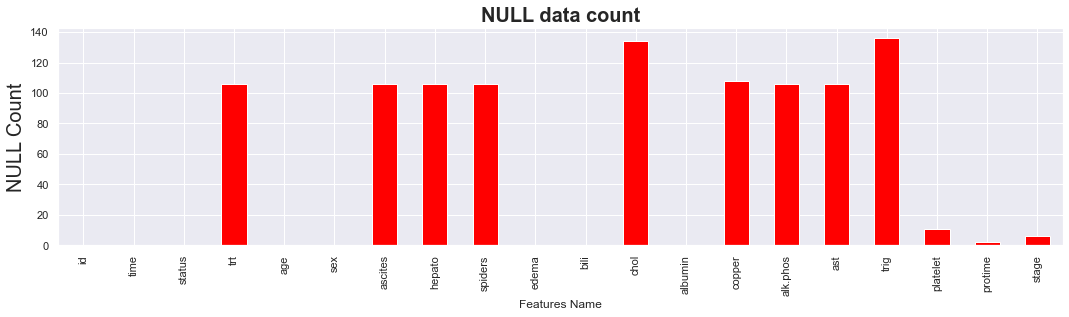

In [6]:
## null counts in here
plt.figure(figsize = (18, 4))
orgdataBar = OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
plt.show()

In [7]:
# data types 
OrgData.dtypes

id            int64
time          int64
status        int64
trt         float64
age         float64
sex          object
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

In [8]:
# Region and sex unique categorical data value for change into num
print(Back.RED+'sex unique values :\n')
print(OrgData.sex.value_counts(),'\n')

sex unique values :

f    374
m     44
Name: sex, dtype: int64 



In [9]:
# use pandas map for change categorical data into num
OrgData['sex']  = OrgData['sex'].map({'f':0, 'm': 1})
OrgData.dtypes

id            int64
time          int64
status        int64
trt         float64
age         float64
sex           int64
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

In [10]:
# change y --> 1, 2, 3 :0 becuse thats not cirrhosis and 4:1 
# We ave 0, 1; 0:not, 1: disorders

OrgData.stage[OrgData.stage < 4] = 0
OrgData.stage[OrgData.stage == 4] = 1

<ipython-input-10-79ec6e993e17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrgData.stage[OrgData.stage < 4] = 0
<ipython-input-10-79ec6e993e17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrgData.stage[OrgData.stage == 4] = 1


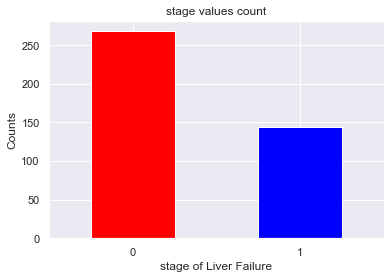

In [11]:
# balance sit for dataset
OrgData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [12]:
# drop null of target, we should droped target nulls 
OrgData = OrgData.dropna(subset=['stage'])

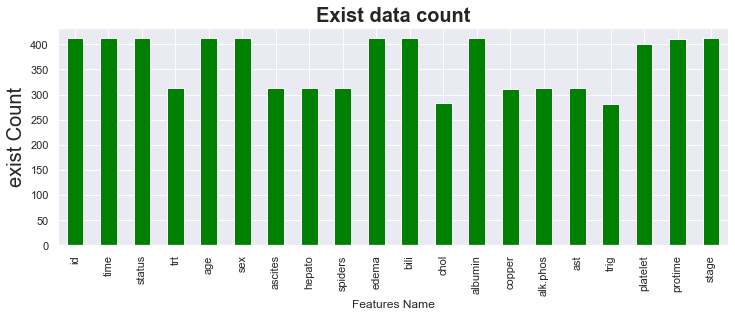

In [13]:
# features count
plt.figure(figsize = (12, 4))
OrgData.describe(include = 'all').T['count'].plot(kind = 'bar', color = 'Green')
plt.xlabel('Features Name')
plt.ylabel('exist Count', fontsize = 20)
plt.title('Exist data count', fontsize = 20,fontweight = 'bold')
plt.show()

Dataset size is :  412


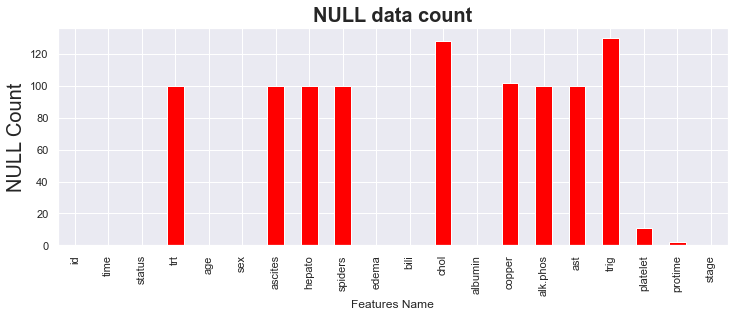

In [14]:
# null data bar
plt.figure(figsize = (12, 4))
OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
print('Dataset size is : ', Back.RED + str(len(OrgData)))
plt.show()

In [15]:
print(Back.WHITE + 'By null data we have ', str(len(OrgData)))
print('After drop all null data we have ', str(len(OrgData.dropna())))
print('by null data we have ', len(OrgData[OrgData.stage == 1]), ' pos instances')
print('Without null data we have ', len(OrgData.dropna()[OrgData.stage == 1]), ' pos instances')
print('dropna null data causes ',
      len(OrgData[OrgData.stage == 1]) - len(OrgData.dropna()[OrgData.stage == 1])
      ,' the lose pos instances')

By null data we have  412
After drop all null data we have  276
by null data we have  144  pos instances
Without null data we have  94  pos instances
dropna null data causes  50  the lose pos instances


<ipython-input-15-325f9e7b2e18>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Without null data we have ', len(OrgData.dropna()[OrgData.stage == 1]), ' pos instances')
<ipython-input-15-325f9e7b2e18>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(OrgData[OrgData.stage == 1]) - len(OrgData.dropna()[OrgData.stage == 1])


Dataset size is :  276


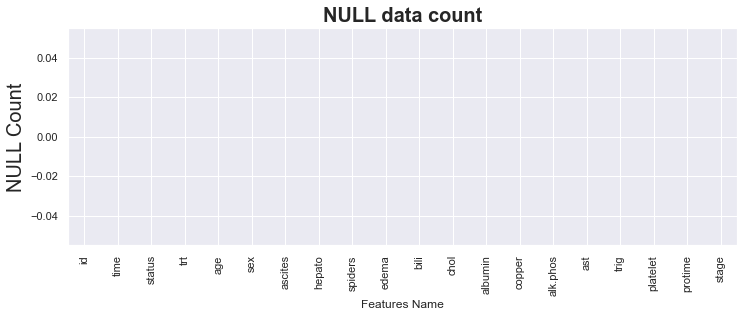

In [16]:

OrgData = OrgData.dropna()
# null data bar
plt.figure(figsize = (12, 4))
OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
print('Dataset size is : ', Back.RED + str(len(OrgData)))
plt.show()

dataset have  276  Instances
dataset have  182  Negative Instances
dataset have  94   Positive Instances


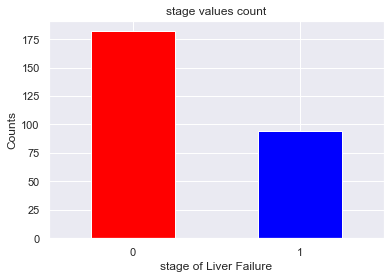

In [17]:
# dataset without null data 
print( Back.WHITE +'dataset have ', Back.RED + str(len(OrgData)), Back.WHITE + ' Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(OrgData.stage.value_counts()[0]),
      Back.WHITE + ' Negative Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(OrgData.stage.value_counts()[1]),
      Back.WHITE + '  Positive Instances')
OrgData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()
priData = OrgData

### first balanced dataset with our method and hen use balanced data for semi-supervised work

In [18]:
# pos and neg instances count
priData.stage.value_counts()

0.0    182
1.0     94
Name: stage, dtype: int64

In [19]:
# Seperate test and train data
# use stratified method for split input and output into train and test parts: 
np.random.seed(42)
trainData, testData = train_test_split(priData, 
                                       test_size = .2)

In [20]:
# percentage of trainig and test 
print(Back.WHITE + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(trainData)/len(priData))*100))), ' %')
print(Back.GREEN + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(testData)/len(priData))*100))), ' %')

Percentage of trainig data is :  79  %
Percentage of trainig data is :  20  %


In [21]:
# count of pos and neg of trainig and test parts
print(Back.WHITE + 'training data Neg instances count is : ', trainData.stage.value_counts()[0], 
     ' & pos counts : ',trainData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',trainData.stage.value_counts()[1]/trainData.stage.value_counts()[0] )
print(Back.RED + 'test data Neg instances count is : ', testData.stage.value_counts()[0], 
     ' & pos counts : ', testData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',testData.stage.value_counts()[1]/testData.stage.value_counts()[0] )


training data Neg instances count is :  146  & pos counts :  74
Pos/Neg in trainig data is :  0.5068493150684932
test data Neg instances count is :  36  & pos counts :  20
Pos/Neg in trainig data is :  0.5555555555555556


In [22]:
# fpercent values : count of feature for new value 
majoritySize = len(trainData[trainData.stage == 0])
minoritySize = len(trainData[trainData.stage == 1])
featureCount = len(trainData.columns)
fPercent = round(featureCount / 10)+1
#fPercent = round(featureCount / 1) # change all feature of instances 
# problem of change all of feture is repeat data 

In [23]:
# create majority and minority dataset
majorityData = trainData[trainData.stage == 0]
majorityData = majorityData.reset_index()
minorityData = trainData[trainData.stage == 1]
minorityData = minorityData.reset_index()
minorityData = minorityData.drop('index', axis = 1)
majorityData = majorityData.drop('index', axis = 1)

In [24]:
# feature names for change column name frm int to real names
featureNames = minorityData.columns 

In [25]:
# feature int name for work by integer values
minorityData.columns = range(1,featureCount+1)
majorityData.columns = range(1,featureCount+1)

In [26]:
# create two empty matrix
minorFeatureValues = []
majorFeatureValues = []
# temporatory matrix for temp instance
minorEXchange = np.array(np.zeros(featureCount))
# loop by feaure count for mean values 
for i in range(featureCount):
    minorFeatureValues.append(round((minorityData[i+1]).mean()))
for i in range(featureCount):
    majorFeatureValues.append(round((majorityData[i+1]).mean()))
# an array by men value of majority and minority of dataset    
minorFeatureValues = np.array(minorFeatureValues)
majorFeatureValues = np.array(majorFeatureValues)

In [27]:
# an array by distance between features of majority and minority 
distanceValue = abs(np.array(majorFeatureValues) - np.array(minorFeatureValues))
distanceValue = np.array(distanceValue)

In [28]:
# if distance is 0 ( mean of minority and majority is eual) not changed
# value os minority change by half of distances ( countinuous value)
# value of categorical features is not change  
for i in range(len(distanceValue)):
    if minorFeatureValues[i] < 2 : # categorical features
        minorEXchange[i] = minorFeatureValues[i]
    elif minorFeatureValues[i] > majorFeatureValues[i]:
        minorEXchange[i] = minorFeatureValues[i] + (distanceValue[i]/2)# minority is bigger
    else:
        minorEXchange[i] = minorFeatureValues[i] - (distanceValue[i]/2) # majority is bigger 

In [29]:
# new instances count
newInsCount = majoritySize - minoritySize

In [30]:
# creator loop
for i in range(newInsCount):
    temAarray = np.zeros(featureCount) # an array by zeros and count of feature size
    featureEch = np.random.randint(1, featureCount, fPercent)# number of features for new values
    randIns = int(np.random.randint(1, i + minoritySize, 1))#select an inatance as parent
    temAarray = minorityData.loc[randIns]#temp array for parent
    temAarray = list(temAarray)#temp arra as list
    temAarray = np.array(temAarray)#temp array as array
    temAarray[[featureEch]] = minorEXchange[[featureEch]]#change randomic (fpercent count) feature by minorExchange array values(same features)
    minorityData.loc[minoritySize+i] = temAarray # new instances in minorityData dataset
    minorityData.loc[minoritySize+i][20] = 1 # sure for value of target label

<ipython-input-30-964e778b0fb0>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  temAarray[[featureEch]] = minorEXchange[[featureEch]]#change randomic (fpercent count) feature by minorExchange array values(same features)


In [31]:
# create value for plus by datasets for mor far
minorityMean = np.zeros(featureCount)
majorityMean = np.zeros(featureCount)
distanceMean = np.zeros(featureCount)
minorityPlus = np.zeros(featureCount)
majorityPlus = np.zeros(featureCount)
for i in range(featureCount):
    minorityMean[i] = round(minorityData[i+1].mean())
    majorityMean[i] = round(majorityData[i+1].mean())
    minorityPlus[i] = minorityMean[i] - majorityMean[i]
    majorityPlus[i] = majorityMean[i] - minorityMean[i]
distanceMean  = abs(minorityMean - majorityMean)

In [32]:
# categorical features
for i in range(featureCount):
    if -1<=minorityPlus[i]<=1:
        minorityPlus[i] = 0

In [33]:
# categorical features
for i in range(featureCount):
    if -1<=majorityPlus[i]<=1:
        majorityPlus[i] = 0

In [34]:
# far away for minority data : first compare two dataset mean values 
# next change off all features 
for i in range(len(minorityData)):
    minorityData.loc[i] = minorityData.loc[i] + minorityPlus


In [35]:
# far away for majority data : first compare two dataset mean values 
# next change off all features 
for i in range(len(majorityData)):
    majorityData.loc[i] = majorityData.loc[i] + majorityPlus
    majorityData.loc[i][20] = 0  
 

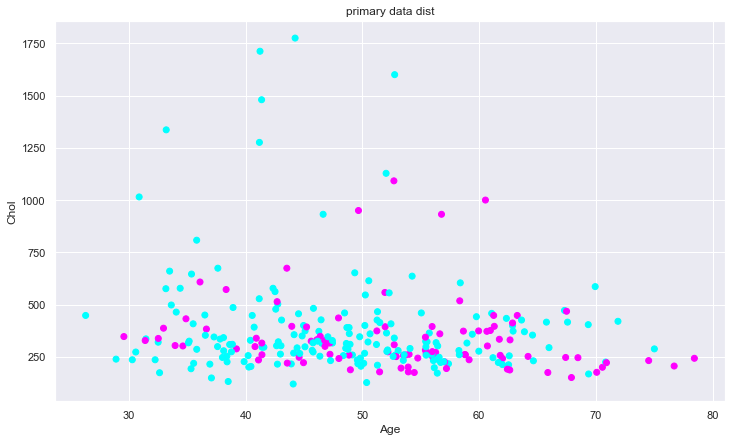

In [36]:
# primary dataset dist
plt.figure(figsize = (12, 7))
plt.scatter(priData['age'], priData['chol'], c = priData['stage'], cmap = 'cool')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('primary data dist')
plt.show()

In [37]:
# create balanced data
balancedData = majorityData
balancedData = balancedData.append(minorityData)
balancedData = balancedData.reset_index()
balancedData = balancedData.drop('index', axis = 1)

In [38]:
# minority dataset and majority dataset shuffle togther
balancedData

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,33.0,4501.0,0.0,2.0,47.410678,0.0,0.0,0.0,0.0,0.0,-1.7,232.0,3.39,-27.0,726.0,66.30,94.0,350.0,10.6,0.0
1,181.0,1864.0,2.0,2.0,28.607118,0.0,0.0,1.0,0.0,0.0,9.0,734.0,3.55,313.0,2580.0,162.40,138.0,510.0,9.8,0.0
2,167.0,3582.0,0.0,1.0,39.662560,0.0,0.0,0.0,0.0,0.0,-0.8,450.0,3.61,-13.0,1677.0,83.35,50.0,302.0,9.0,0.0
3,104.0,4278.0,0.0,2.0,53.521561,0.0,0.0,0.0,0.0,0.0,-1.4,272.0,4.03,-35.0,816.0,66.30,75.0,355.0,17.1,0.0
4,40.0,5446.0,0.0,1.0,39.870637,0.0,0.0,0.0,0.0,0.0,-0.9,421.0,3.64,-9.0,5598.2,62.08,87.0,242.0,10.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,263.0,766.0,1.0,2.0,83.524298,1.0,0.0,1.0,0.0,0.0,8.0,172.0,3.59,201.0,1725.0,103.00,130.0,171.0,10.9,1.0
288,252.0,893.0,1.0,1.0,56.980835,0.0,0.0,0.0,1.0,0.0,3.3,182.0,3.20,80.0,1388.0,180.15,73.0,156.0,11.5,1.0
289,242.0,-196.0,2.0,1.0,66.500000,0.0,0.0,1.0,1.0,0.0,2.8,240.0,2.94,276.0,1725.0,135.20,141.5,280.0,11.2,1.0
290,124.0,138.5,2.0,2.0,76.906913,1.0,1.0,1.0,0.0,1.0,3.3,91.0,3.08,201.0,1725.0,51.50,141.5,171.0,13.2,1.0


In [39]:
# use features name for new balanced dataset
balancedData = balancedData.sample(frac = 1)
balancedData = balancedData.reset_index()
balancedData = balancedData.drop(['index'], axis = 1)
balancedData.columns = featureNames

In [40]:
# new dataset as balanced
balancedData.stage.value_counts()

0.0    146
1.0    146
Name: stage, dtype: int64

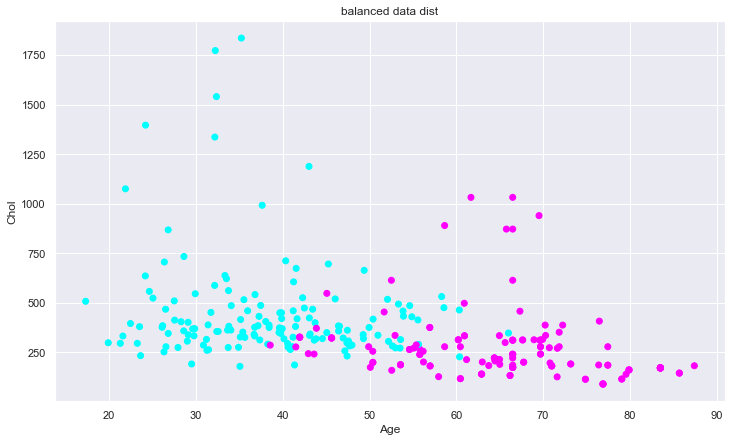

In [41]:
# balanced dataset dist
plt.figure(figsize = (12, 7))
plt.scatter(balancedData['age'], balancedData['chol'], c = balancedData['stage'], cmap = 'cool')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('balanced data dist')
plt.show()

### we have a balanced  dataset 

dataset have  292  Instances
dataset have  146  Negative Instances
dataset have  146   Positive Instances


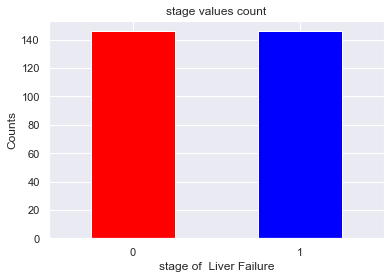

In [42]:
#new dataset balancing
print( Back.WHITE +'dataset have ', Back.RED + str(len(balancedData)), Back.WHITE + ' Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(balancedData.stage.value_counts()[0]),
      Back.WHITE + ' Negative Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(balancedData.stage.value_counts()[1]),
      Back.WHITE + '  Positive Instances')
balancedData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of  Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [43]:
# Seperate test and train data
# use stratified method for split input and output into train and test parts: 
np.random.seed(42)
trainData, testData = train_test_split(balancedData, 
                                       test_size = .2)

In [44]:
print(Back.WHITE + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(trainData)/len(balancedData))*100))), ' %')
print(Back.GREEN + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(testData)/len(balancedData))*100))), ' %')

Percentage of trainig data is :  79  %
Percentage of trainig data is :  20  %


In [45]:
print(Back.WHITE + 'training data Neg instances count is : ', trainData.stage.value_counts()[0], 
     ' & pos counts : ',trainData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',trainData.stage.value_counts()[1]/trainData.stage.value_counts()[0] )
print(Back.RED + 'test data Neg instances count is : ', testData.stage.value_counts()[0], 
     ' & pos counts : ', testData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',testData.stage.value_counts()[1]/testData.stage.value_counts()[0] )


training data Neg instances count is :  116  & pos counts :  117
Pos/Neg in trainig data is :  1.0086206896551724
test data Neg instances count is :  30  & pos counts :  29
Pos/Neg in trainig data is :  0.9666666666666667


### divide dataset into separaed train and test part

In [46]:
np.random.seed(42)
# define training and test data
x_train = trainData.drop('stage', axis = 1)
y_train = trainData.stage

x_test = testData.drop('stage', axis = 1)
y_test = testData.stage

#### use train part for train label and use test part for new labels

#### train part :

In [47]:
x_train = x_train.reset_index()
x_train = x_train.drop('index', axis = 1)
y_train = y_train.reset_index()
y_train = y_train.drop('index', axis = 1)

In [48]:
x_train

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime
0,294.0,11.0,1.0,1.0,49.900753,0.0,0.0,0.0,0.0,0.0,5.2,279.0,3.18,168.0,3168.0,210.00,86.0,265.0,9.9
1,134.0,-40.0,2.0,2.0,71.001369,0.0,0.0,1.0,1.0,0.0,4.8,182.0,3.80,119.0,446.0,141.40,106.0,82.0,13.2
2,248.0,2347.0,0.0,1.0,47.974675,0.0,0.0,0.0,0.0,0.0,-1.5,287.0,3.61,-5.0,844.0,78.00,118.0,288.0,9.9
3,148.0,3760.0,0.0,1.0,46.041752,0.0,0.0,0.0,0.0,0.0,-1.1,520.0,3.03,12.0,889.0,80.25,172.0,340.0,9.4
4,153.0,1743.0,2.0,2.0,50.408624,0.0,0.0,1.0,0.0,0.0,23.5,418.0,3.52,174.0,2636.0,196.50,203.0,190.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,45.0,5317.0,0.0,2.0,40.136208,1.0,0.0,0.0,0.0,0.0,-0.1,319.0,3.70,236.0,10564.8,183.34,176.0,253.0,11.0
229,306.0,360.0,1.0,2.0,66.500000,0.0,0.0,1.0,1.0,0.0,3.0,312.0,3.25,153.0,1022.0,144.50,57.0,209.0,10.6
230,32.0,3737.0,2.0,2.0,39.618754,0.0,0.0,0.0,0.0,0.0,-0.8,374.0,3.20,156.0,12426.8,67.24,149.0,470.0,10.6
231,99.0,3989.0,0.0,1.0,47.569473,0.0,0.0,0.0,0.0,0.0,-1.1,308.0,3.97,127.0,814.0,57.00,82.0,167.0,10.1


In [49]:
y_train

,stage
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
228,0.0
229,1.0
230,0.0
231,0.0


In [50]:
x_test = x_test.reset_index()
x_test = x_test.drop('index', axis = 1)
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis = 1)

In [51]:
x_test

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime
0,263.0,766.0,0.0,2.0,83.524298,1.0,0.0,1.0,0.0,0.0,7.6,172.0,3.59,233.0,952.0,103.00,130.0,209.0,10.9
1,86.0,3160.0,0.0,1.0,65.013689,0.0,0.0,1.0,0.0,0.5,3.3,190.0,3.50,93.0,970.0,76.30,102.0,42.0,12.9
2,84.0,1650.0,2.0,1.0,72.263518,0.0,0.0,1.0,1.0,0.0,16.4,388.0,3.65,79.0,1050.0,65.45,320.0,346.0,11.7
3,43.0,3146.0,2.0,1.0,36.798768,0.0,0.0,1.0,0.0,0.0,3.7,542.0,2.84,116.0,11720.0,131.74,163.0,557.0,12.7
4,103.0,-338.0,2.0,2.0,60.468857,1.0,0.0,1.0,0.0,0.0,8.0,118.0,3.00,190.0,578.0,183.25,124.0,171.0,12.0
5,65.0,2200.0,2.0,2.0,69.706366,0.0,1.0,0.0,0.0,0.0,3.3,242.0,2.75,103.0,1355.0,144.50,114.0,290.0,13.2
6,103.0,-338.0,2.0,2.0,60.468857,0.0,0.0,1.0,0.0,0.0,8.0,279.0,3.00,190.0,578.0,144.50,124.0,171.0,12.0
7,65.0,4929.0,0.0,1.0,23.613279,0.0,0.0,0.0,0.0,0.0,-1.3,234.0,4.09,13.0,810.0,66.30,44.0,242.0,10.6
8,283.0,2298.0,0.0,1.0,29.852841,0.0,0.0,1.0,1.0,0.0,0.0,370.0,3.36,25.0,1425.0,117.00,116.0,182.0,9.8
9,116.0,138.5,2.0,1.0,60.233402,0.0,0.0,1.0,1.0,0.0,8.0,314.0,3.74,148.0,811.0,133.65,102.0,227.0,11.1


In [52]:
y_test

,stage
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
5,1.0
6,1.0
7,0.0
8,0.0
9,1.0


In [53]:
# define new variable for Pos & Neg Average
posMean = minorityMean
negMean = majorityMean

# define new variable for calculate distance between avareage of pos and neg from mean of train dataset
posDistance = np.zeros(featureCount)
negDistance = np.zeros(featureCount)

# define temporary array for vote between Pos and Neg classes
voteArray = np.zeros(featureCount)

# define predictions variables array
predictionLabel = np.zeros(len(x_test))

featureCountTest = featureCount - 1

### use test part of Original dataset for new labels

In [55]:
for i in range(len(x_test)):
    for j in range(featureCountTest):
        posDistance[j] = abs(x_test.iloc[i][j] - posMean[j])
        negDistance[j] = abs(x_test.iloc[i][j] - negMean[j])
        if posDistance[j] == negDistance[j]:
            voteArray[j] = 2
        elif  posDistance[j] < negDistance[j]:

            voteArray[j] = 0
    if np.count_nonzero(voteArray == 0) > np.count_nonzero(voteArray == 1):
        predictionLabel[i] = 0
    else:
        predictionLabel[i] = 1 
predictionLabel       

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
predictionLabel

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
np.count_nonzero(predictionLabel == 0)

59

In [58]:
np.count_nonzero(predictionLabel == 1)

0

In [59]:
y_test = np.array(y_test).T

In [60]:
resultsArray = (y_test - predictionLabel)

In [61]:
# count of Trues
Tcount = np.count_nonzero(resultsArray == 0)

In [62]:
# percenrtage of True
print(Back.RED + 'accuracy of True label is : ',Back.GREEN + str(round(((Tcount/len(x_test))*100),2)),'%')

accuracy of True label is :  50.85 %


In [63]:
#y_test = np.array(y_test).T

# self_training_model Method on MAYO dataset

In [64]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(trainData.stage.shape[0]) < 0.3
trainData.stage[random_unlabeled_points] = -1
svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(x_train, y_train)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_self_training.py:187: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))

In [65]:
self_training_modelPredict = self_training_model.predict(x_test)

In [66]:
self_training_modelPredictResults = y_test - self_training_modelPredict 

In [67]:
# count of Trues of self_training_model
Tcountself_training_model = np.count_nonzero(self_training_modelPredictResults == 0)

In [68]:
# percenrtage of self_training_model
print(Back.RED + 'accuracy of True of self_training_model on MAYO dataset is : '
      ,Back.GREEN + str(round(((Tcountself_training_model/len(x_test))*100))),'%')

accuracy of True of self_training_model on MAYO dataset is :  63 %


# LogisticRegression  Method on MAYO dataset

In [69]:
# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
# make predictions on hold out test set
yhat = model.predict(x_test)
# calculate score for test set
# score = accuracy_score(y_test, yhat)
# scoreLogistic = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Logistic Regression on MAYO dataset is : '
      ,Back.GREEN + str(((yhat))),'%')

accuracy of True of Logistic Regression on MAYO dataset is :  [ 1. -1.  0.  0.  1. -1.  1.  0.  0.  1. -1.  0.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  1.  1. -1.  0. -1.  1.  0.  0. -1. -1. -1.  1.  0.  0.  0.
  0.  0.  0. -1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0. -1.  1.  0.  1.
  1.  1.  0.  0.  1.] %


# Label Spreading  Method on Acute dataset

In [74]:
# define model
from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading()
# fit model on training dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

LabelSpreading()

In [76]:
# make predictions on hold out test set
yhatB = model.predict(x_test)
# calculate score for test set
# score = accuracy_score(y_test, yhat)
# scoreLabelSpreading = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Label Spreading on MAYO dataset is : '
      ,Back.GREEN + str(((yhatB))),'%')

accuracy of True of Label Spreading on MAYO dataset is :  [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] %


c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


# LabelPropagation  Method on MAYO dataset

In [77]:
# define model
from sklearn.semi_supervised import LabelPropagation
model = LabelPropagation()
# fit model on training dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


LabelPropagation()

In [78]:
# make predictions on hold out test set
yhatC = model.predict(x_test)
# calculate score for test set
# score = accuracy_score(y_test, yhat)
# scoreLabelPropagation = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Label Propagation on MAYO dataset is : '
      ,Back.GREEN + str(((yhatC))),'%')

accuracy of True of Label Propagation on MAYO dataset is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] %


# Results: 

In [81]:
# percenrtage of True
print(Back.RED + 'accuracy of New method is  : ',Back.GREEN + str(round(((Tcount/len(x_test))*100),2)),'% \n')

print('**********************************************************************************\n')

# percenrtage of self_training_model
print(Back.RED + 'accuracy of True of self_training_model on MAYO dataset is : '
      ,Back.GREEN + str(round(((Tcountself_training_model/len(x_test))*100),2)),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Logistic Regression on MAYO dataset is : '
      ,Back.GREEN + str(((yhat))),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Label Spreading on MAYO dataset is : '
      ,Back.GREEN + str(((yhatB))),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Label Propagation on MAYO dataset is : '
      ,Back.GREEN + str(((yhatC))),'%')

accuracy of New method is  :  50.85 % 

**********************************************************************************

accuracy of True of self_training_model on MAYO dataset is :  62.71 % 

**********************************************************************************

accuracy of True of Logistic Regression on MAYO dataset is :  [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] % 

**********************************************************************************

accuracy of True of Label Spreading on MAYO dataset is :  [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] % 

**********************************************************************************

accuracy of True of Label Propagation on MAYO dataset is :  [0